José Luis Roberto Zárate Cortés (000183347)
# Semana 2; Clase 2_calculo_DeI; Práctica 2, 1_aproximacion_a_derivadas_e_integrales.ipynb.

Otras Reglas de Cuadratura Gaussiana--
Ejercicio 4: aproximar las integrales:
$$(2\pi\sigma^2)^{-\frac{1}{2}}\int_{-\infty}^{\infty} t e^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$
$$(2\pi\sigma^2)^{-\frac{1}{2}}\int_{-\infty}^{\infty} t^2 e^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$
donde: $\sigma=0.25, \mu=0.15$ cuyos valores respectivamente son: $0.15, 0.085$ con cuadratura de Gauss-Hermite. Para lo anterior, realizar cambio de variable $x=\frac{t-\mu}{\sqrt{2\sigma^2}}, dt=\sqrt{2\sigma^2}dx$

# SOLUCIÓN:
Para la cuadratura de Gauss-Hermite requerimos acomodar la integral en la forma $\int_{-\infty}^{\infty} e^{-x^2}f(x)dx$, que con la sustitución propuesta las integrales quedan en la forma:
$$(\pi)^{-\frac{1}{2}}\int_{-\infty}^{\infty} (\sqrt{2\sigma^2}x+\mu) e^{-x^2}dx$$
$$(\pi)^{-\frac{1}{2}}\int_{-\infty}^{\infty} (\sqrt{2\sigma^2}x+\mu)^2 e^{-x^2}dx$$
Tomando f(x)= $(\sqrt{2\sigma^2}x+\mu)$ para la primer integral y f(x)=$(\sqrt{2\sigma^2}x+\mu)^2$ para la segunda, obtenemos la forma deseada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, pi, sin, abs, array, sqrt, exp
muval=0.15
sigval=0.25
valint1=0.15
valint2=0.085

In [2]:
#Para la segunda integrarl, utilizaremos el sub-índice 2

basen=array([1,2,3,4,5])
flsumando = lambda x, w : w*(sqrt(2*sigval**2)*x+muval) #Primer integral
flsumando2 = lambda x, w : w*(sqrt(2*sigval**2)*x+muval)**2 #Segunda integral

def F_gausshermite(n):
    xi = array([[-0.707107,0.707107,0,0,0,0],[-1.224745,0,1.224745,0,0,0],[-1.65068,-0.524648,0.524648,1.65068,0,0],[-2.020183,-0.958572,0,0.958572,2.020183,0],[-2.350605,-1.335849,-0.436077,0.436077,1.335849,2.350605]])
    wi = array([[0.886227,0.886227,0,0,0,0],[0.295409,1.181636,0.295409,0,0,0],[0.0813128,0.804914,0.804914,0.0813128 ,0,0],[0.0199532,0.393619,0.945308,0.393619,0.0199532,0],[0.00453001,0.157067,0.724629,0.724629,0.157067,0.00453001]])
    suma=0
    suma2=0
    for i in range(n+1):
        suma=suma+flsumando(xi[n-1,i],wi[n-1,i])
        suma2=suma2+flsumando2(xi[n-1,i],wi[n-1,i])
    fgauherm=sqrt(pi)**-1*suma
    Err_Rel_GL=abs(fgauherm-valint1)/valint1 
    fgauherm2=sqrt(pi)**-1*suma2
    Err_Rel_GL2=abs(fgauherm2-valint2)/valint2 
    print('Vfun1=',fgauherm,", ErrRel1=",Err_Rel_GL,'  ---  Vfun2=',fgauherm2,", ErrRel2=",Err_Rel_GL2)
    return Err_Rel_GL, Err_Rel_GL2

Vfun1= 0.1500000126176332 , ErrRel1= 8.41175547735181e-08   ---  Vfun2= 0.08500004583112043 , ErrRel2= 5.391896520771034e-07
Vfun1= 0.1500000126176332 , ErrRel1= 8.41175547735181e-08   ---  Vfun2= 0.08500002027603493 , ErrRel2= 2.385415872999609e-07
Vfun1= 0.1499999787662582 , ErrRel1= 1.4155827861757805e-07   ---  Vfun2= 0.08500001988514785 , ErrRel2= 2.3394291585631566e-07
Vfun1= 0.14999987721213315 , ErrRel1= 8.185857789759037e-07   ---  Vfun2= 0.08499986751027236 , ErrRel2= 1.5587026782027487e-06
Vfun1= 0.1499998450533269 , ErrRel1= 1.0329778206881932e-06   ---  Vfun2= 0.0849998392208095 , ErrRel2= 1.891519888268653e-06


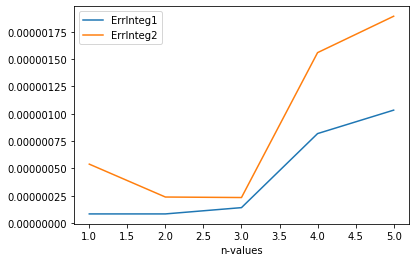

In [3]:
plt.plot(basen,list(map(F_gausshermite,basen)))
plt.xlabel('n-values')
plt.legend(('ErrInteg1','ErrInteg2'),loc = 0)
plt.show()